# Risk and Returns

### Xcel Energy and Black Hills Energy
Analysis of risk and returns

In [2]:
import numpy as np 
import pandas as pd 

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# warnings and ignore for ease of reading notebook
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

import scipy.stats as st

import edhec_risk_kit as erk

# Data Collection

In [3]:
# stocks to assess, create ticker objects 
# Xcel Energy
xcel = yf.Ticker('XEL')
# Black Hills Energy
bhe = yf.Ticker('BKH')

In [4]:
# xcel stock prices
xcel_hist = xcel.history(period='max', interval='1mo') 

In [4]:
xcel_hist.head(1) # obtain first observation: 1985-01-01

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-01 00:00:00-05:00,0.0,1.730741,1.626897,1.710961,5585200,0.0,0.0


In [5]:
# bhe stock prices
bhe_hist = bhe.history(period='max', interval='1mo')

In [6]:
bhe_hist.head(1) # obtain first observation: 1985-01-01

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-01 00:00:00-05:00,1.258339,1.356918,1.223546,1.287333,609300,0.0,0.0


In [7]:
print(xcel_hist.shape) # how many months, how many columns
print(bhe_hist.shape) # the data for the two stocks match

(462, 7)
(462, 7)


In [6]:
# export data
xcel_hist.to_csv('xcel_stock_max_period.csv', index=True)
bhe_hist.to_csv('bhe_stock_max_period.csv', index=True)

# Data Cleaning

In [9]:
# check for null values
print(xcel_hist.isnull().sum())
print(bhe_hist.isnull().sum()) 
# no null values

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [10]:
# look at data types
print(xcel_hist.info())
print(bhe_hist.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1985-01-01 00:00:00-05:00 to 2023-06-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          462 non-null    float64
 1   High          462 non-null    float64
 2   Low           462 non-null    float64
 3   Close         462 non-null    float64
 4   Volume        462 non-null    int64  
 5   Dividends     462 non-null    float64
 6   Stock Splits  462 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 28.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1985-01-01 00:00:00-05:00 to 2023-06-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          462 non-null    float64
 1   High          462 non-null    float64
 2   Low           462 non-null    float64
 3   Close         462 non-null    f

In [7]:
# obtain time series in format desired
xcel_hist.index = pd.to_datetime(xcel_hist.index, format='%Y%m')
xcel_hist.index = xcel_hist.index.to_period('M') 
xcel_hist.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01,0.0,1.73074,1.626896,1.710961,5585200,0.0,0.0


In [8]:
bhe_hist.index = pd.to_datetime(bhe_hist.index, format='%Y%m')
bhe_hist.index = bhe_hist.index.to_period('M') 
bhe_hist.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01,1.258339,1.356919,1.223546,1.287333,609300,0.0,0.0


In [9]:
# select desired columns
xcel_series = xcel_hist['Close']
bhe_series = bhe_hist['Close']

In [10]:
# merge data side by side
stocks = pd.concat([xcel_series, bhe_series], axis=1)
# rename columns
stocks.columns = ['xcel_stock_price', 'bhe_stock_price']
stocks # great and we still have our 462 observations

,xcel_stock_price,bhe_stock_price
Date,,
1985-01,1.710961,1.287333
1985-02,1.666456,1.333723
1985-03,1.730741,1.362717
1985-04,1.804915,1.397509
1985-05,1.893924,1.554078
...,...,...
2023-02,64.055817,60.218014
2023-03,66.902962,62.483978
2023-04,69.910004,64.652603


In [21]:
# export data
stocks.to_csv('both_stocks_max_period.csv', index=True)

### Prices to Returns

Return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [11]:
# select prices from purchase date onwards
prices = stocks['2020':]
prices.head(1) # look at purchase price

,xcel_stock_price,bhe_stock_price
Date,,
2020-01,63.287907,73.515945


<Axes: title={'center': 'Stock Prices 2020 to Present'}, xlabel='Date'>

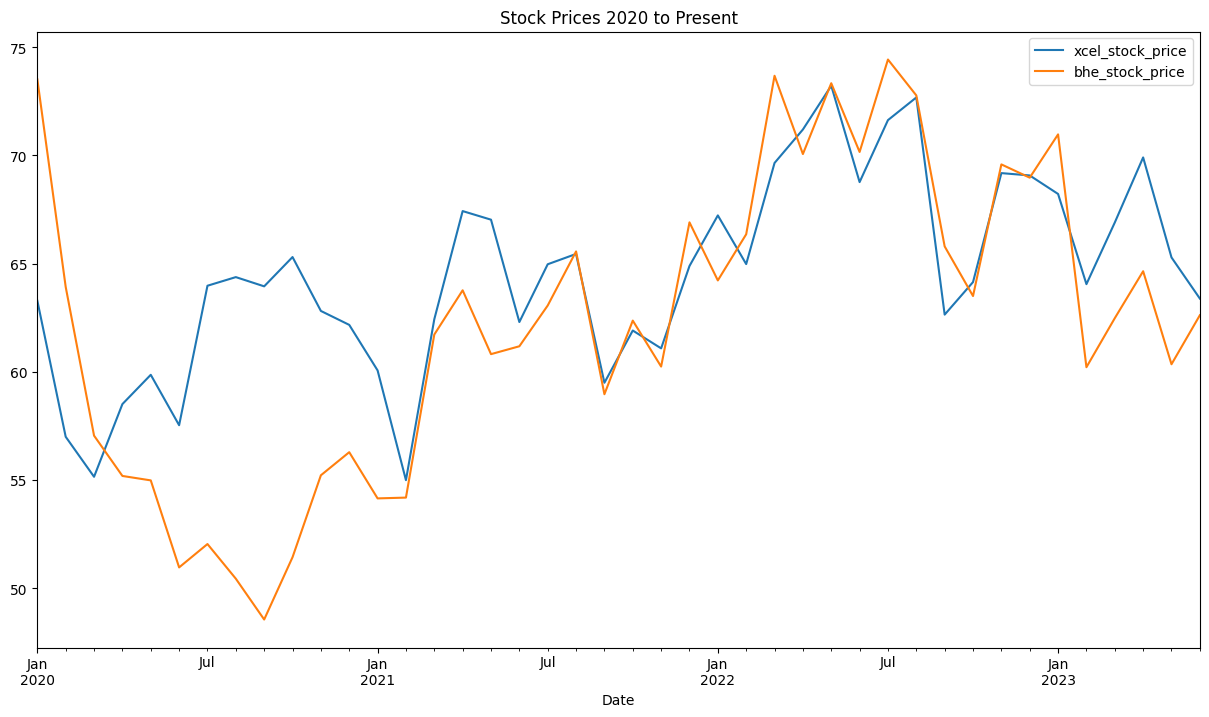

In [43]:
# look at prices over time
prices.plot(kind='line', title='Stock Prices 2020 to Present', figsize=[15,8])

In [12]:
# calculate returns
returns = prices.pct_change(1)
# rename columns
returns.columns = ['xcel_returns', 'bhe_returns']
# look at returns
returns

,xcel_returns,bhe_returns
Date,,
2020-01,NaN,NaN
2020-02,-0.099292,-0.130435
2020-03,-0.032413,-0.107465
2020-04,0.060890,-0.032641
2020-05,0.023128,-0.003713
2020-06,-0.038905,-0.073110
2020-07,0.111987,0.021179
2020-08,0.006228,-0.030764
2020-09,-0.006621,-0.037385


<Axes: title={'center': 'Returns 2020 to Present'}, xlabel='Date'>

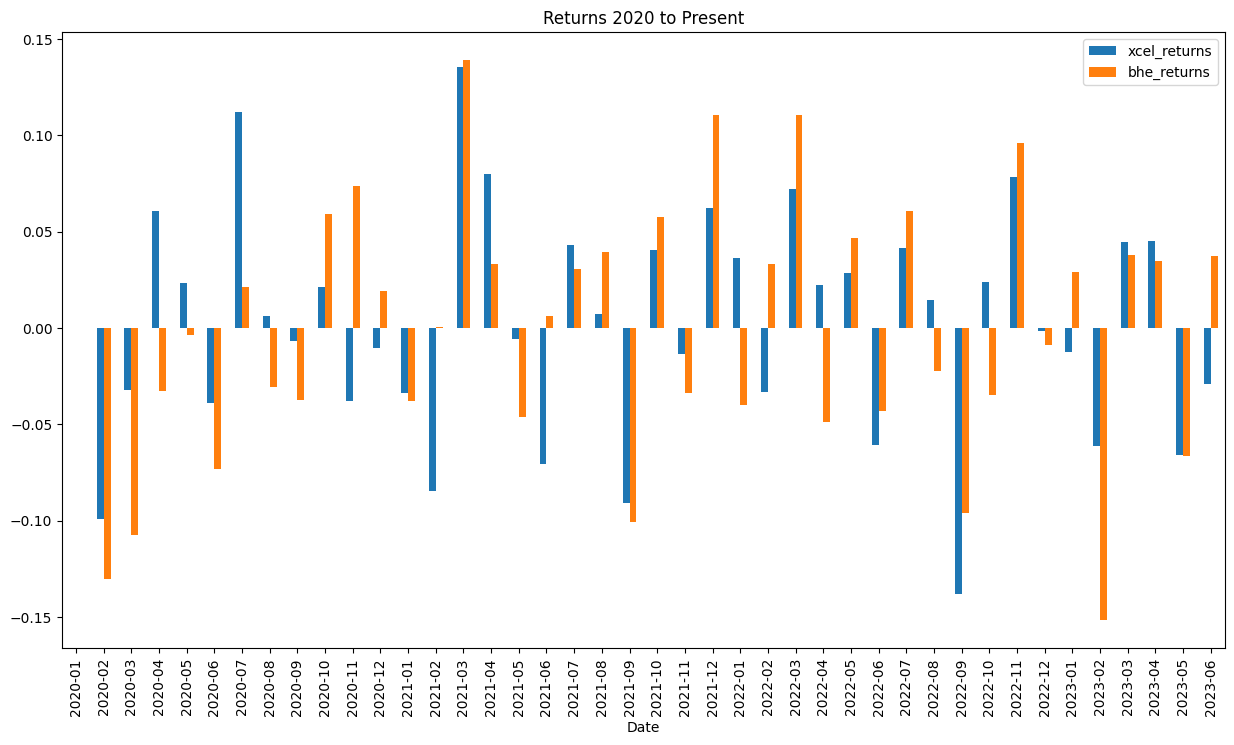

In [84]:
# plot returns
returns.plot(kind='bar', title='Returns 2020 to Present', figsize=[15,8])

In [13]:
# calculate the return per month
n_months = len(returns) 
return_per_month = (returns + 1).prod()**(1/n_months) - 1 
return_per_month

xcel_returns    0.000106
bhe_returns    -0.003843
dtype: float64

# Compounded Returns

In [14]:
# calculate compounded returns
# multiple each cell value by the next cell value
((np.prod(returns+1)-1)*100).round(2)

xcel_returns     0.45
bhe_returns    -14.93
dtype: float64

Xcel provided a compounded returns of 0.16%, Black Hills provided a compounded return of -14.82%.  

# Annualizing Returns

Compound the return for n time periods in a year. 

Monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

Quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

Daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

In [15]:
# calculate annualized return
n_months = len(returns) 
annualized_return = (returns + 1).prod()**(12/n_months) - 1 
annualized_return

xcel_returns    0.001271
bhe_returns    -0.045148
dtype: float64

# Risk and Volatility

In [16]:
# simple volatility
returns.std()

xcel_returns    0.058786
bhe_returns     0.066654
dtype: float64

### Annualize Volatility

In [17]:
# annualized volatility
returns.std()*np.sqrt(12)

xcel_returns    0.203640
bhe_returns     0.230897
dtype: float64

### Return on Risk Ratio

In [18]:
# calculate
annualized_return/(returns.std()*np.sqrt(12))

xcel_returns    0.006244
bhe_returns    -0.195533
dtype: float64

Xcel gives slightly higher return per unit of volatility

### Sharpe Ratio

look at the ratio of the **excess** return over the risk free per volatility

*there is no perfectly riskless investment, the US Treasury Bill provides a proxy for the risk free rate*

[Daily Treasury Par Yield Curve Rates 10 Yr](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023) 

In [19]:
# Daily Treasury Bill Rates
I10YTCMR = pd.read_csv('https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/2023/all?type=daily_treasury_yield_curve&field_tdr_date_value=2023&page&_format=csv',
                         index_col='Date', parse_dates=True)
proxy = I10YTCMR['10 Yr'][0]
proxy

3.73

In [21]:
# return - risk free rate / volatility
risk_free_rate = proxy/100 
annualized_volatiltity = returns.std()*np.sqrt(12)
excess_return = annualized_return - risk_free_rate
sharpe_ratio = excess_return/annualized_volatiltity
sharpe_ratio

xcel_returns   -0.176923
bhe_returns    -0.357077
dtype: float64

Xcel provided a slightly superior risk adjusted return over Black Hills

# Drawdowns

### Wealth Index

In [22]:
# start with $1000 -> compute the growth of $1 over time 
wealth_index = 1000*(1+returns.xcel_returns).cumprod()
wealth_index.head()

Date
2020-01           NaN
2020-02    900.707963
2020-03    871.513142
2020-04    924.579693
2020-05    945.962957
Freq: M, Name: xcel_returns, dtype: float64

<Axes: title={'center': 'Xcel Wealth Index'}, xlabel='Date'>

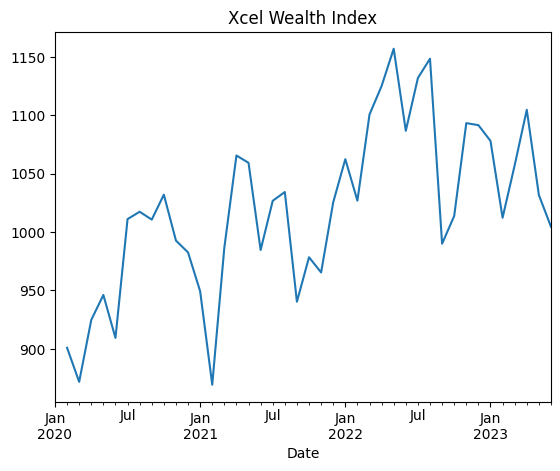

In [23]:
wealth_index.plot(title='Xcel Wealth Index')

In [24]:
# start with $1000 -> compute the growth of $1 over time 
wealth_index = 1000*(1+returns.bhe_returns).cumprod()
wealth_index.head()

Date
2020-01           NaN
2020-02    869.565184
2020-03    776.117225
2020-04    750.783997
2020-05    747.996084
Freq: M, Name: bhe_returns, dtype: float64

<Axes: title={'center': 'Black Hills Wealth Index'}, xlabel='Date'>

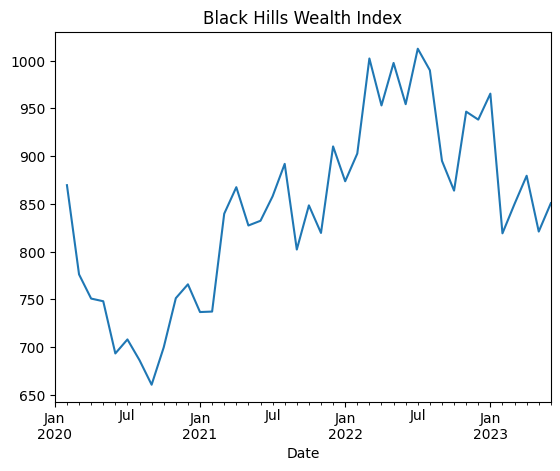

In [25]:
wealth_index.plot(title='Black Hills Wealth Index')

### Previous Peaks

In [26]:
wealth_index = 1000*(1+returns.xcel_returns).cumprod()
previous_peaks = wealth_index.cummax()

<Axes: title={'center': 'Xcel Previous Peaks: where as wealth index drops, this measure never declines'}, xlabel='Date'>

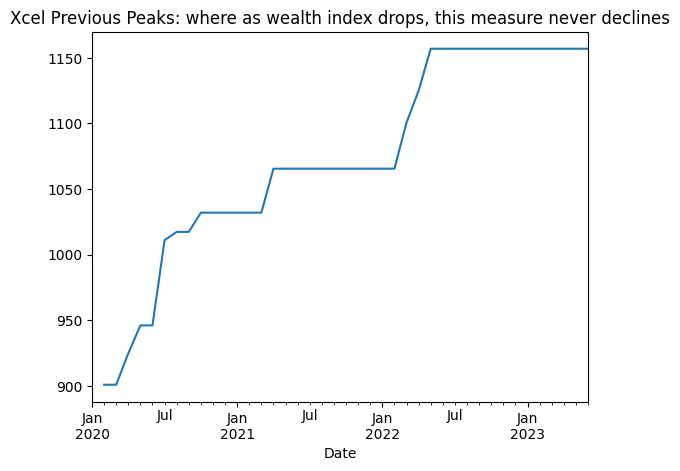

In [27]:
previous_peaks.plot(title='Xcel Previous Peaks: where as wealth index drops, this measure never declines')

In [28]:
wealth_index = 1000*(1+returns.bhe_returns).cumprod()
previous_peaks = wealth_index.cummax()

<Axes: title={'center': 'Black Hills Previous Peaks'}, xlabel='Date'>

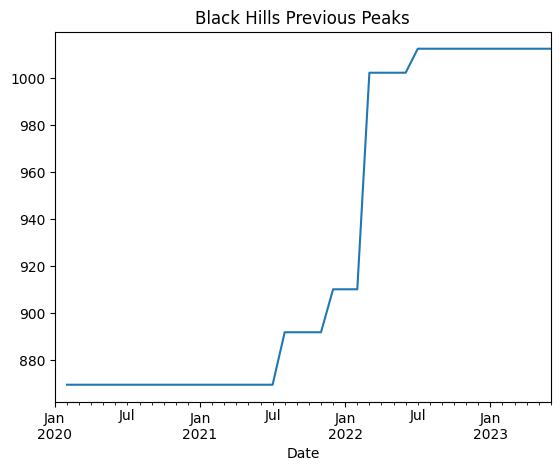

In [29]:
previous_peaks.plot(title='Black Hills Previous Peaks')

### Drawdown

Xcel largest loss -15.782060088644654 % on 2021-02


<Axes: xlabel='Date'>

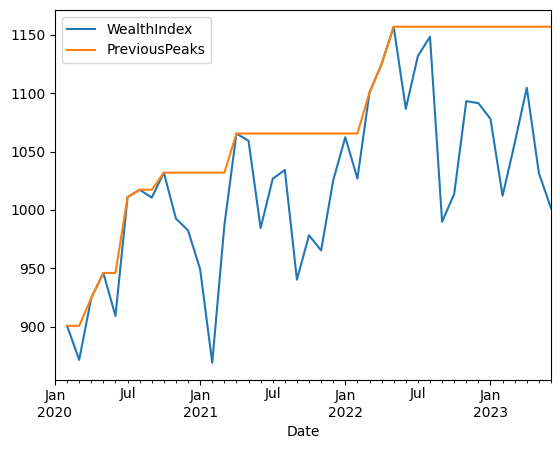

In [122]:
XcelDrawdowns = erk.drawdown(returns.xcel_returns)
print('Xcel largest loss', XcelDrawdowns['Drawdown'].min()*100,'% on', XcelDrawdowns['Drawdown'].idxmin())
XcelDrawdowns[['WealthIndex', 'PreviousPeaks']].plot()

Bhe largest loss -24.035706777596037 % on 2020-09


<Axes: xlabel='Date'>

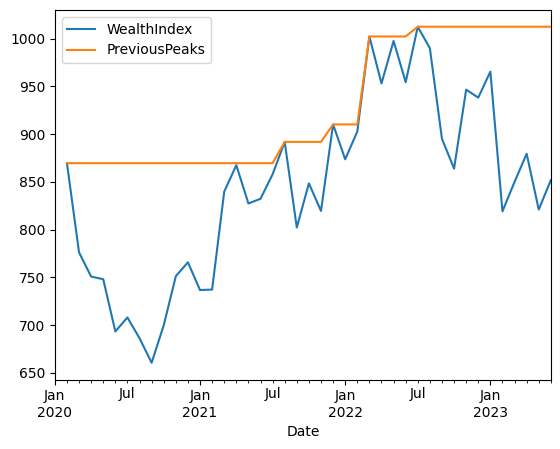

In [123]:
BheDrawdowns = erk.drawdown(returns.bhe_returns)
print('Bhe largest loss', BheDrawdowns['Drawdown'].min()*100,'% on', BheDrawdowns['Drawdown'].idxmin())
BheDrawdowns[['WealthIndex', 'PreviousPeaks']].plot()

<Axes: xlabel='Date'>

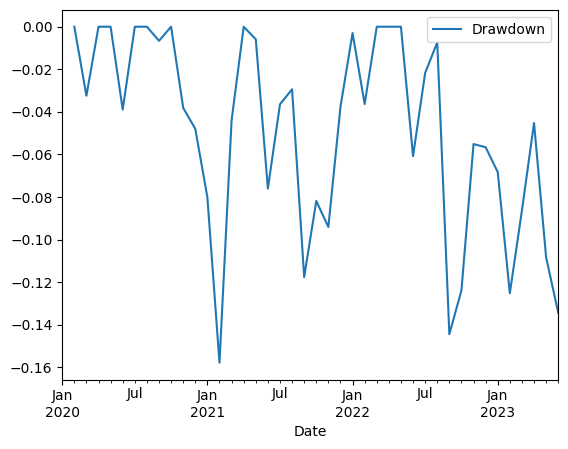

In [116]:
XcelDrawdowns[['Drawdown']].plot()

<Axes: xlabel='Date'>

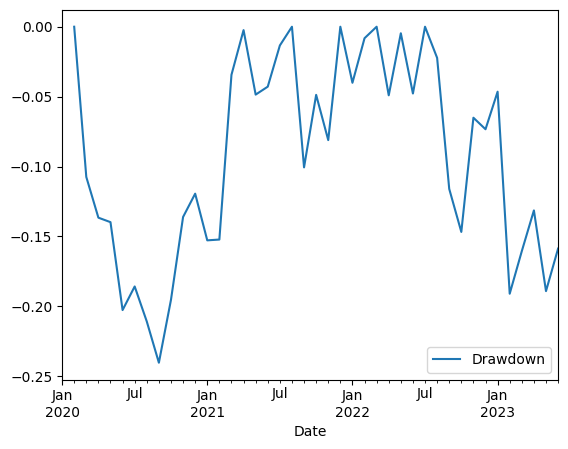

In [117]:
BheDrawdowns[['Drawdown']].plot()

# Deviations from Normality

### Testing for Normality

<Axes: ylabel='Count'>

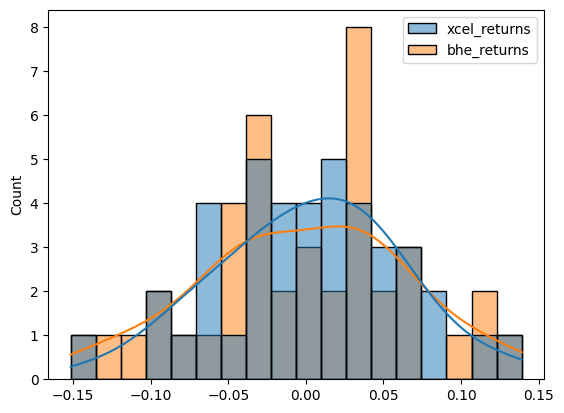

In [59]:
sns.histplot(returns, kde=True, bins=18)

In [48]:
# compare the median and the mean, test for positive skewness
pd.concat([returns.mean(), returns.median(), returns.mean()>returns.median()], axis='columns')

,0,1,2
xcel_returns,0.001805,0.006228,False
bhe_returns,-0.001743,0.000677,False


#### Skewness

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


In [45]:
# use defined function
erk.skewness(returns).sort_values()

bhe_returns    -0.127234
xcel_returns   -0.102921
dtype: float64

very slight negative skew, skew = 0 for normal distributions, here possibly more negative returns than would 'otherwise expect', otherwise being mean

#### Kurtosis

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

In [60]:
# use defined function
erk.kurtosis(returns)

xcel_returns    2.808317
bhe_returns     2.643295
dtype: float64

Values are very close to 3, normal distributions have kurtosis of 3, some evidence of thinner tails, suggestive of less huge swings

#### Jarque-Bera Test

In [63]:
# test for normal distribution
# h0 = normal distribution with default 1% level of significance
# --> p>0.01 --> accept null --> normal
# apply to columns seperately
returns.aggregate(st.jarque_bera) 

,xcel_returns,bhe_returns
0,0.135152,0.327986
1,0.934656,0.848748


In [62]:
# use defined test based on jarque-bera
returns.aggregate(erk.is_normal) 

xcel_returns    True
bhe_returns     True
dtype: bool

### SemiDeviation

average deviation or average uncertainty below the mean

In [30]:
returns.std(ddof=0) # deviations on the upside and the downside

xcel_returns    0.058064
bhe_returns     0.065836
dtype: float64

In [31]:
# look at std of returns that are negative only, we are interested in risk
returns[returns<0].std(ddof=0)

xcel_returns    0.035954
bhe_returns     0.039183
dtype: float64

In [32]:
# apply defined function
erk.semideviation3(returns)

xcel_returns    0.059985
bhe_returns     0.068012
dtype: float64

### VaR

Value at Risk

Represents the maximum ‘expected’ loss over a given period

Maximum potential loss threshold

The maximum loss that can occur to a portfolio holding with a given probability

actually what happens beyond value at risk that might even be of a greater concern to investors...

### VaR Methods

- Historical VaR
- Parametric VaR - Gaussian
- Cornish-Fisher VaR (Modified VaR)

### Historic VaR

In [35]:
# find 5% VaR: value at risk at a 5% level, worst 5%, the cutoff
returns.dropna(inplace=True)
np.percentile(returns, 5, axis=0) # axis 0 on columns

array([-0.09090914, -0.10746516])

* Xcel: there is a 5% chance that in any given month you will loose 9.1%
* Black Hills: there is a 5% chance that in any given month you will loose 10.7%

In [36]:
# use defined function
erk.var_historic(returns)

xcel_returns    0.090909
bhe_returns     0.107465
dtype: float64

### Parametric Gaussian VaR

In [38]:
z = st.norm.ppf(0.05) # z = our cutoff level
-(returns.mean() + z*returns.std(ddof=0)) # --> VaR at 5% level

xcel_returns    0.093703
bhe_returns     0.110033
dtype: float64

In [40]:
# use defined function, default level=5
erk.var_gaussian(returns, level=1)

xcel_returns    0.133273
bhe_returns     0.154900
dtype: float64

### Cornish-Fisher VaR (Modified VaR)

adjusts for skewness and kurtosis

In [41]:
# define and use a function
erk.var_cornish_fisher(returns)

xcel_returns    0.095615
bhe_returns     0.112868
dtype: float64

#### compare VaR methods

<Axes: title={'center': 'VaR Methods'}>

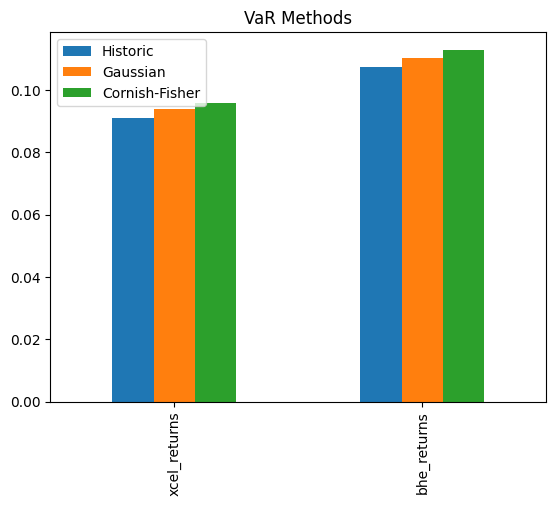

In [42]:
var_list = [erk.var_historic(returns), erk.var_gaussian(returns), erk.var_cornish_fisher(returns)]
comparison = pd.concat(var_list, axis = 1)
comparison.columns = ["Historic", "Gaussian", "Cornish-Fisher"]
comparison.plot.bar(title="VaR Methods")

# BeyondVaR: CVaR

expected return, conditional upon the return being less than the value at risk number

CVaR is given by the average loss beyond the VaR

In [43]:
# use defined CVaR function
erk.cvar_historic(returns)

xcel_returns    0.109416
bhe_returns     0.129820
dtype: float64

if the worse 5% case occurs:
* average loss of 10.94% with Xcel in one month
* average loss of 12.98% with Black Hills in one month

Conclusions

As the Cornish-Fisher expansion recognizes asset returns are not normally distributed and you are not specifying any particular return distribution this tends to be a relatively robust value at risk estimate...but perhaps in this special case of returns with Gaussian distributions, Cornish-Fisher may underestimate magnitude of risk, and VaR Gaussian may be more appropriate here.  